In [2]:
import numpy as np 
import pandas as pd

In [3]:
df = pd.read_csv('laptop_data.csv')

In [4]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.shape

(1303, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [10]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

In [11]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

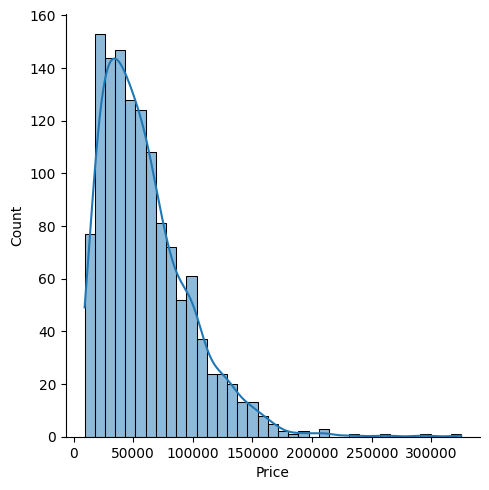

In [13]:
sns.displot(df['Price'], kde=True)

<Axes: xlabel='Company'>

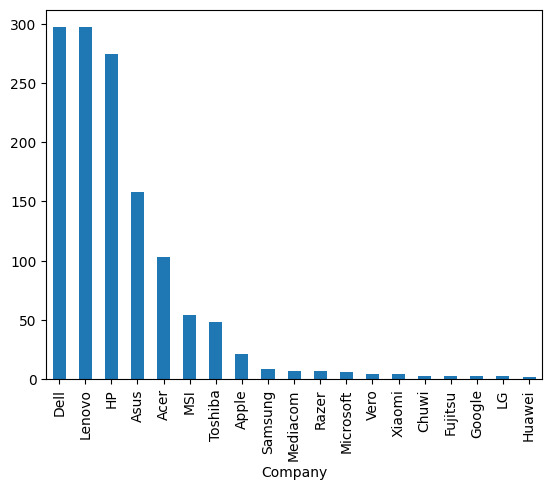

In [14]:
df['Company'].value_counts().plot(kind='bar')

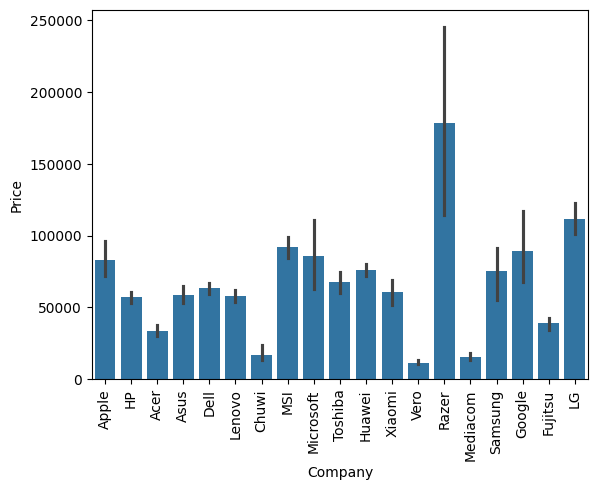

In [15]:
sns.barplot(x='Company', y='Price', data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='TypeName'>

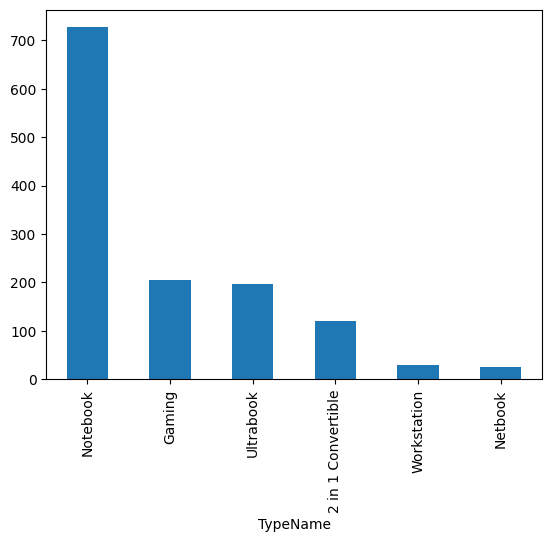

In [16]:
df['TypeName'].value_counts().plot(kind='bar')

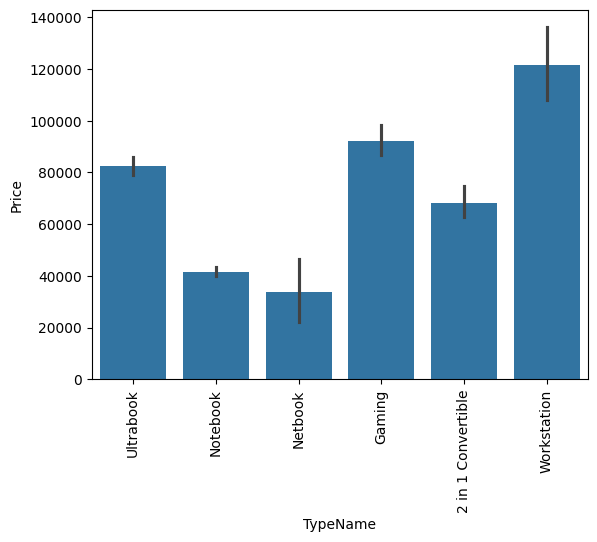

In [17]:
sns.barplot(x='TypeName', y='Price', data=df)
plt.xticks(rotation=90)
plt.show()

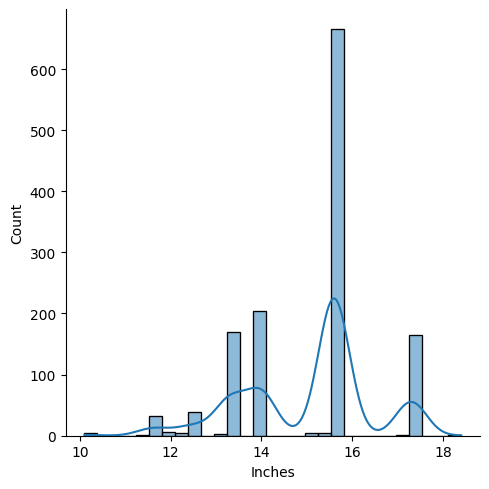

In [18]:
sns.displot(df['Inches'], kde=True)

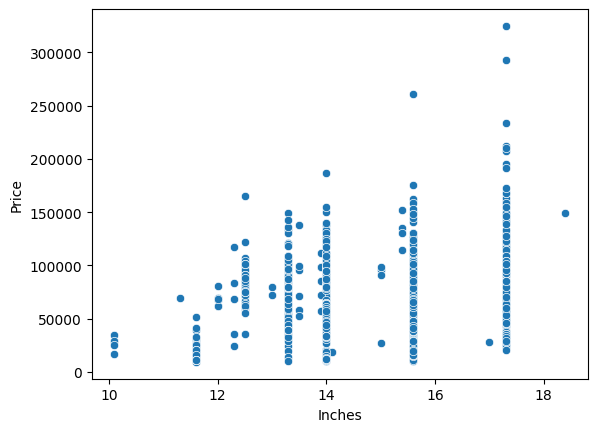

In [19]:
sns.scatterplot(x='Inches', y='Price', data=df)
plt.show()

In [20]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [21]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)


<Axes: xlabel='Touchscreen', ylabel='Price'>

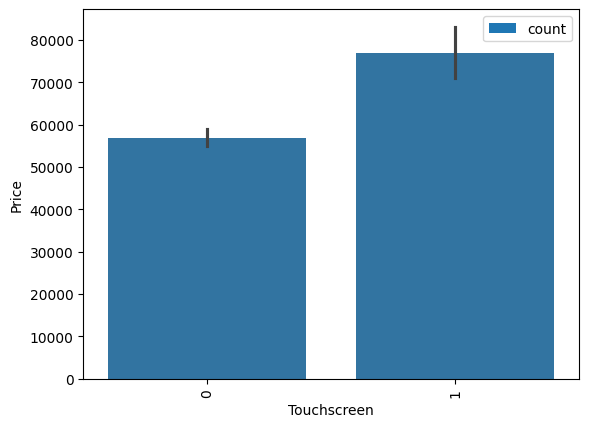

In [22]:
df['Touchscreen'].value_counts().plot(kind='bar')
sns.barplot(x='Touchscreen', y='Price', data=df)

<Axes: xlabel='IPS'>

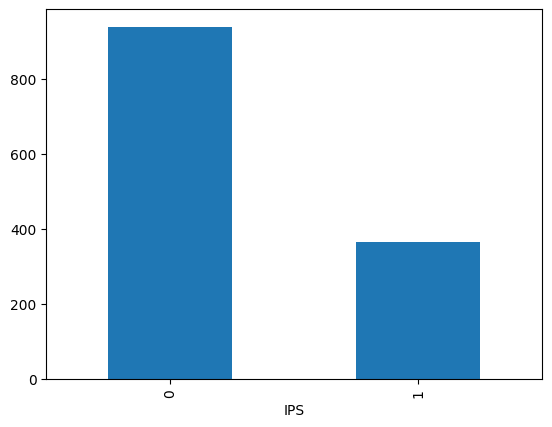

In [23]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df['IPS'].value_counts().plot(kind='bar')

<Axes: xlabel='IPS', ylabel='Price'>

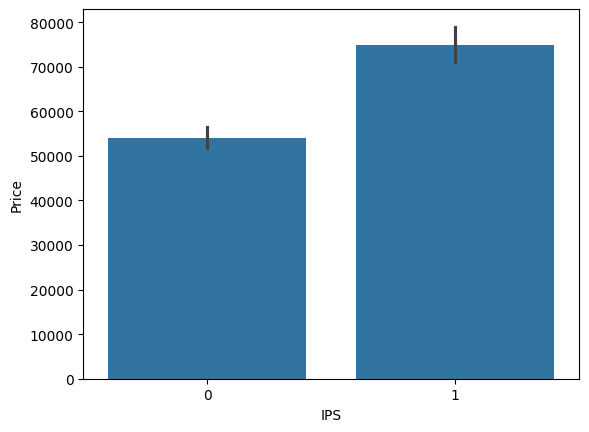

In [24]:
sns.barplot(x='IPS', y='Price', data=df)

In [25]:
temp = df['ScreenResolution'].str.split('x', n=1 , expand=True)

In [26]:
df['X_res'] = temp[0].str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0]).astype(int)
df['Y_res'] = temp[1].str.replace('cm', '').astype(int)

In [27]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 152.8+ KB


In [29]:
df.select_dtypes(include=['number']).corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [30]:
df['PPI'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5 / df['Inches']).astype(float)

In [31]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'], inplace=True)

In [32]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [33]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [34]:
df['Cpu'].apply(lambda x: x.split(' ')[0:3]).value_counts()

Cpu
[Intel, Core, i7]               527
[Intel, Core, i5]               423
[Intel, Core, i3]               136
[Intel, Celeron, Dual]           80
[Intel, Pentium, Quad]           27
[Intel, Core, M]                 19
[AMD, A9-Series, 9420]           12
[AMD, A6-Series, 9220]            8
[Intel, Celeron, Quad]            8
[AMD, A12-Series, 9720P]          7
[Intel, Atom, x5-Z8350]           5
[AMD, A8-Series, 7410]            4
[Intel, Atom, x5-Z8550]           4
[AMD, A9-Series, 9410]            3
[Intel, Pentium, Dual]            3
[AMD, Ryzen, 1700]                3
[AMD, A9-Series, A9-9420]         2
[AMD, E-Series, E2-9000e]         2
[AMD, A10-Series, A10-9620P]      2
[AMD, A6-Series, A6-9220]         2
[AMD, E-Series, 7110]             2
[AMD, A10-Series, 9620P]          2
[AMD, A10-Series, 9600P]          2
[Intel, Xeon, E3-1505M]           2
[Intel, Xeon, E3-1535M]           2
[Intel, Atom, X5-Z8350]           2
[Intel, Atom, x5-Z8300]           1
[AMD, E-Series, 6110]   

In [35]:
df['CPU Name'] = df['Cpu'].apply(lambda x: ' '.join(x.split(' ')[0:3]))

In [36]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [37]:
def fetch_processor(text):
    if text == 'Intel Core i7'or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split(' ')[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [38]:
df['CPU Brand'] = df['CPU Name'].apply(fetch_processor)

<Axes: xlabel='CPU Brand'>

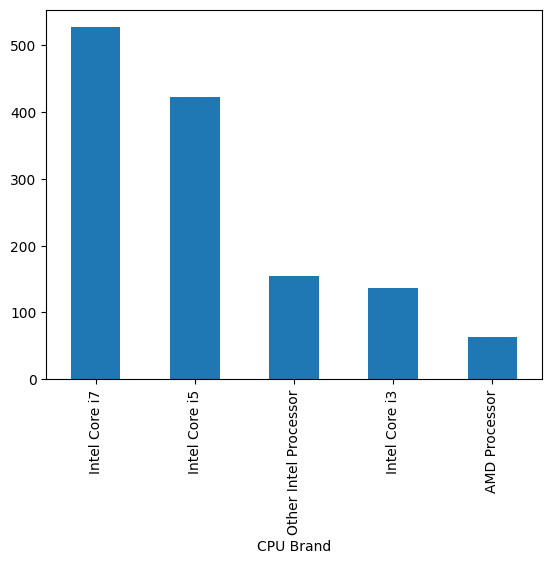

In [39]:
df['CPU Brand'].value_counts().head(5).plot(kind='bar')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

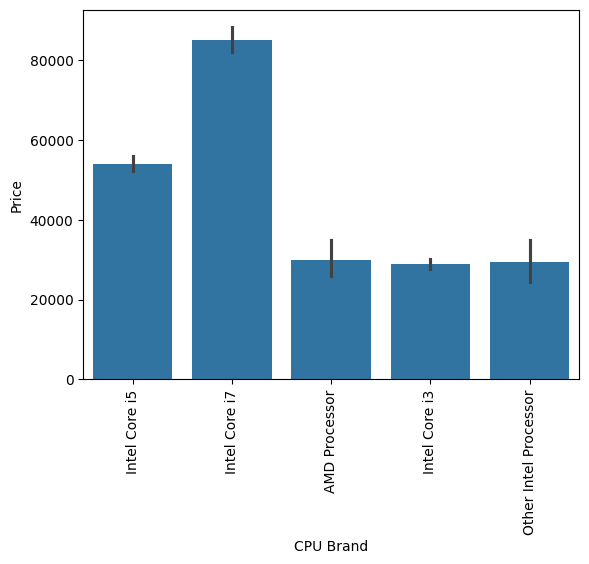

In [40]:
sns.barplot(x='CPU Brand', y='Price', data=df)
plt.xticks(rotation=90)

In [41]:
df.drop(columns=['Cpu','CPU Name'], inplace=True)

In [42]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

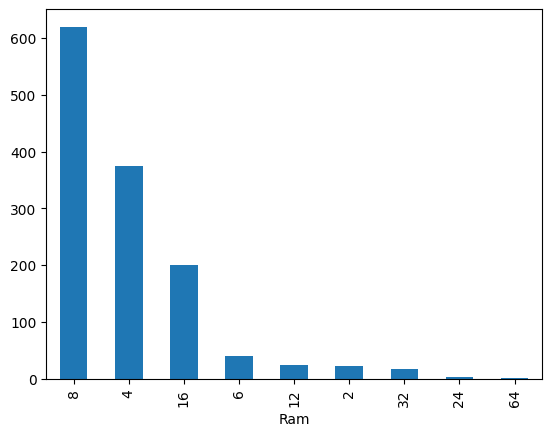

In [43]:
df['Ram'].value_counts().plot(kind='bar')

<Axes: xlabel='Ram', ylabel='Price'>

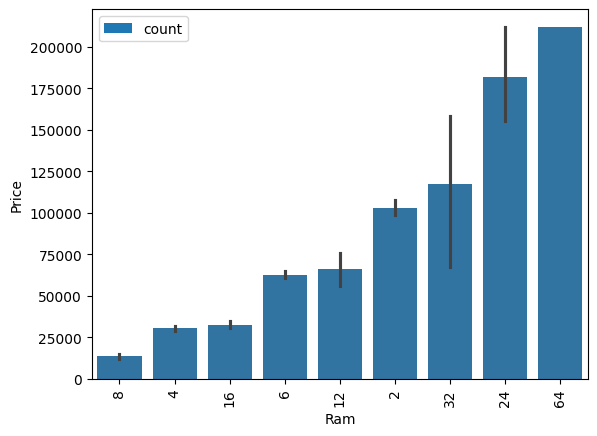

In [44]:
df['Ram'].value_counts().plot(kind='bar')
sns.barplot(x='Ram', y='Price', data=df)

In [45]:
df['Memory'].value_counts()    

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [46]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.extract(r'(\d+)')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.extract(r'(\d+)')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\dhawa\AppData\Local\Temp\ipykernel_7852\1833494163.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
C:\Users\dhawa\AppData\Local\Temp\ipykernel_7852\1833494163.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["second"].fillna("0", inplace = True)


In [47]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
969,Lenovo,Notebook,6,256 SSD,Nvidia GeForce 920MX,Windows 10,2.40,37029.6000,0,0,141.211998,Intel Core i5,0,256,0,0
752,Asus,Notebook,4,1000 HDD,Nvidia GeForce GTX 950M,No OS,2.45,30849.1200,0,0,100.454670,Intel Core i5,1000,0,0,0
581,Dell,Notebook,8,500 HDD,Intel HD Graphics 620,Windows 10,1.90,53733.9456,0,0,100.454670,Intel Core i5,500,0,0,0
558,HP,Notebook,6,128 SSD,AMD Radeon 530,Windows 10,1.91,30310.9920,0,1,141.211998,AMD Processor,0,128,0,0
230,Asus,Notebook,4,1000 HDD,Intel HD Graphics 620,Windows 10,2.37,21258.1872,0,0,100.454670,Intel Core i3,1000,0,0,0


In [48]:
df.drop(columns=['Memory'],inplace=True)

In [49]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [50]:
df.select_dtypes(include=['number']).corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [51]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [52]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [53]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [54]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [55]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [56]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [57]:
df = df[df['Gpu brand'] != 'ARM']

In [58]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

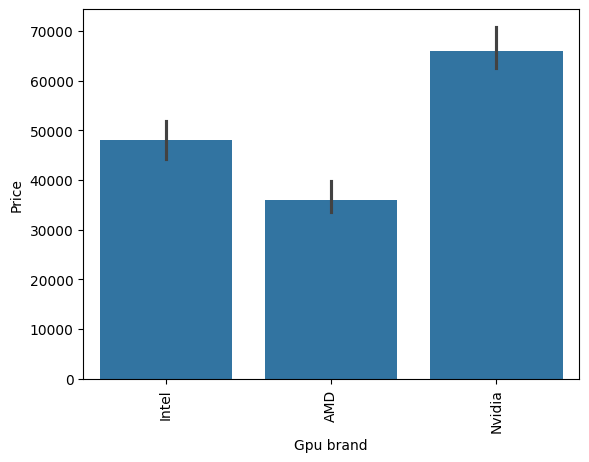

In [59]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [60]:
df.drop(columns=['Gpu'],inplace=True)

In [61]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


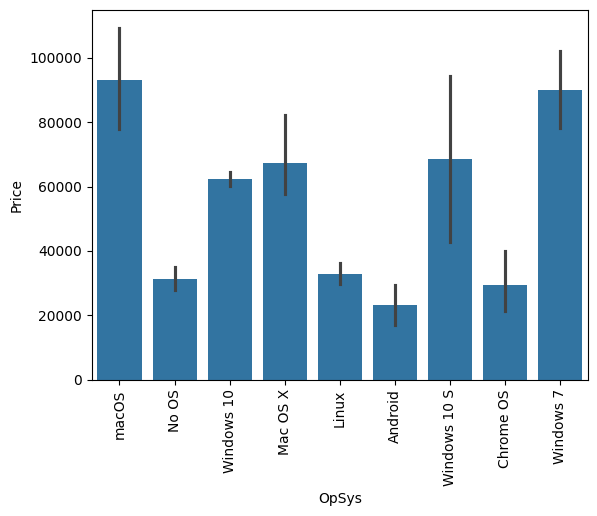

In [62]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [63]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [64]:
df['os'] = df['OpSys'].apply(cat_os)


In [65]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [66]:
df.drop(columns=['OpSys'],inplace=True)

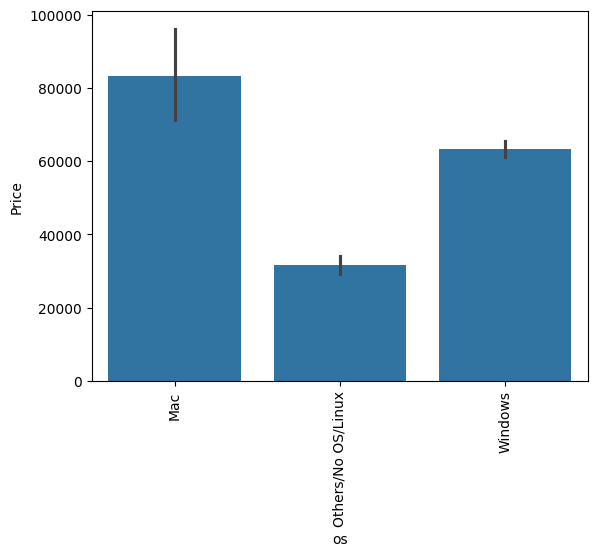

In [67]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\dhawa\AppData\Local\Temp\ipykernel_7852\3442460328.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

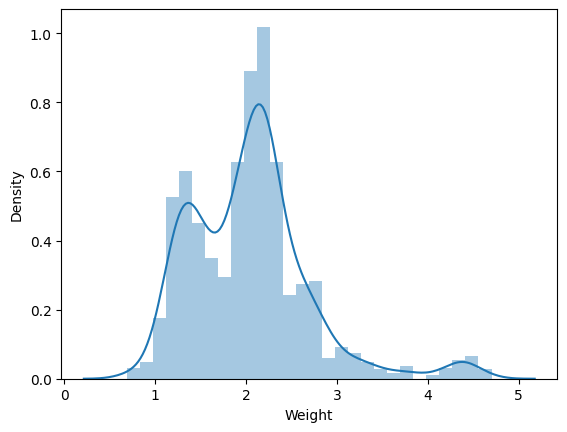

In [68]:
sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Price'>

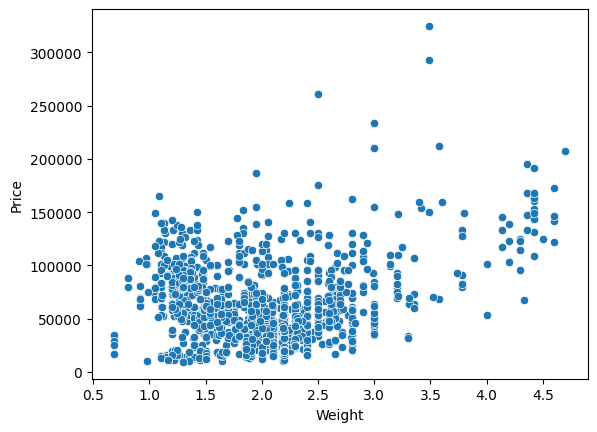

In [69]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [70]:
df.select_dtypes(include=['number']).corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
IPS            0.253320
PPI            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

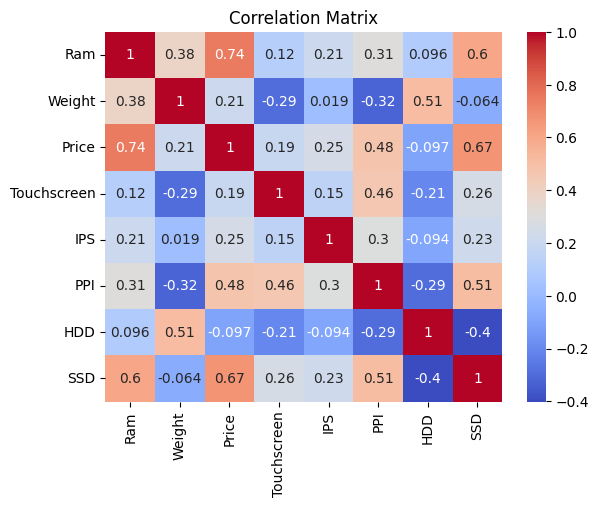

In [71]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\dhawa\AppData\Local\Temp\ipykernel_7852\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

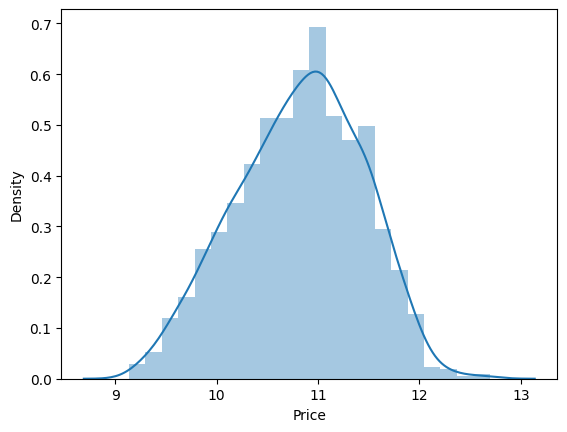

In [72]:
sns.distplot(np.log(df['Price']))

In [73]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [74]:
X

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,CPU Brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [75]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [77]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,CPU Brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


### Importing Libraries for encoding categorical cloumn values to numerical values 

In [78]:
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error

### Importing Models to find which model fits best for predicting prices 

In [79]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [80]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Linear Regression

In [81]:
#Transforming categorical variables into numerical variables using OneHotEncoder
step1 = ColumnTransformer(transformers=[ ('encoder', OneHotEncoder(sparse_output=False, drop='first'), ['Company', 'TypeName', 'CPU Brand', 'os', 'Gpu brand'])], remainder='passthrough')

# Creating a Linear Regression model
step2 = LinearRegression()

# Creating a pipeline that first transforms the data and then fits the model
pipeline = Pipeline(steps=[('step1', step1), ('step2', step2)])

# Fitting the model to the training data
pipeline.fit(X_train, y_train)

# Making predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculating the R-squared score and Mean Absolute Error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

R-squared: 0.8073277450155125
Mean Absolute Error: 0.2101782795301903


# Ridge Regression

In [82]:
# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), [0, 1, 7, 10, 11]),
        ('num', StandardScaler(), [2, 5, 6, 8]) # Example: Scale numerical columns
    ],
    remainder='passthrough')
# Define the model
ridge = Ridge()

# Define the parameter grid for a specific model (e.g., Ridge)
param_grid_ridge = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create the pipeline
pipeline_ridge = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('ridge', Ridge())])

# Perform GridSearchCV
grid_search_ridge = GridSearchCV(pipeline_ridge, param_grid_ridge, cv=5, scoring=['r2', 'neg_mean_absolute_error'], refit='r2')
grid_search_ridge.fit(X_train, y_train)

# Get the best parameters and scores
best_params_ridge = grid_search_ridge.best_params_
best_score_ridge = grid_search_ridge.best_score_
best_ridge_model = grid_search_ridge.best_estimator_
best_ridge_model.fit(X_train, y_train)
y_pred_ridge = best_ridge_model.predict(X_test) 
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f"Best Parameters for Ridge: {best_params_ridge}")
print(f"Best R-squared for Ridge: {best_score_ridge}")
print(f"R-squared for Ridge: {r2_ridge}")
print(f"Mean Absolute Error for Ridge: {mae_ridge}")


Best Parameters for Ridge: {'ridge__alpha': 0.001}
Best R-squared for Ridge: 0.8178998786323861
R-squared for Ridge: 0.8073311534876167
Mean Absolute Error for Ridge: 0.2101770929078219


#  Lasso Regression

In [83]:
# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), [0, 1, 7, 10, 11]),
        ('num', StandardScaler(), [2, 5, 6, 8]) # Example: Scale numerical columns
    ],
    remainder='passthrough')

# Define the model
lasso = Lasso()

# Define the parameter grid for Lasso
param_grid_lasso = {'lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}

# Create the pipeline
pipeline_lasso = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('lasso', lasso)])

# Perform GridSearchCV
grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid_lasso, cv=5, scoring=['r2', 'neg_mean_absolute_error'], refit='r2')
grid_search_lasso.fit(X_train, y_train)

# Get the best parameters and scores
best_params_lasso = grid_search_lasso.best_params_
best_score_lasso = grid_search_lasso.best_score_
best_lasso_model = grid_search_lasso.best_estimator_
best_lasso_model.fit(X_train, y_train)
y_pred_lasso = best_lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print(f"Best Parameters for Lasso: {best_params_lasso}")
print(f"Best R-squared (Cross-validated) for Lasso: {best_score_lasso}")
print(f"R-squared on Test Set for Lasso: {r2_lasso}")
print(f"Mean Absolute Error on Test Set for Lasso: {mae_lasso}")

Best Parameters for Lasso: {'lasso__alpha': 0.0001}
Best R-squared (Cross-validated) for Lasso: 0.8173007576982991
R-squared on Test Set for Lasso: 0.8082583774925288
Mean Absolute Error on Test Set for Lasso: 0.20991263830338863


# KNN

In [84]:
# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), [0, 1, 7, 10, 11]),
        ('num', StandardScaler(), [2, 5, 6, 8]) # Example: Scale numerical columns
    ],
    remainder='passthrough')

# Define the KNN model
knn = KNeighborsRegressor()

# Define the parameter grid for KNN (correct way to specify parameters in a pipeline)
param_grid_knn = {'knn__n_neighbors': [2, 3, 5, 7, 10, 15],
                  'knn__weights': ['uniform', 'distance'],
                  'knn__p': [1, 2]} # 1 for Manhattan, 2 for Euclidean

# Create the pipeline
pipeline_knn = Pipeline(steps=[('preprocessor', preprocessor),
                               ('knn', knn)])

# Perform GridSearchCV
grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring=['r2', 'neg_mean_absolute_error'], refit='r2')
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and scores
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_
best_knn_model = grid_search_knn.best_estimator_
best_knn_model.fit(X_train, y_train)
y_pred_knn = best_knn_model.predict(X_test)
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print(f"Best Parameters for KNN: {best_params_knn}")
print(f"Best R-squared (Cross-validated) for KNN: {best_score_knn}")
print(f"R-squared on Test Set for KNN: {r2_knn}")
print(f"Mean Absolute Error on Test Set for KNN: {mae_knn}")

Best Parameters for KNN: {'knn__n_neighbors': 7, 'knn__p': 1, 'knn__weights': 'distance'}
Best R-squared (Cross-validated) for KNN: 0.8256825912288297
R-squared on Test Set for KNN: 0.8750098287812176
Mean Absolute Error on Test Set for KNN: 0.15781767038835293


# Decision Tree

In [85]:
# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), [0, 1, 7, 10, 11]),
        ('num', StandardScaler(), [2, 5, 6, 8]) # Example: Scale numerical columns
    ],
    remainder='passthrough')

# Define the Decision Tree model
decision_tree = DecisionTreeRegressor(random_state=42) # Added random_state for reproducibility

# Define the parameter grid for Decision Tree
param_grid_dt = {'decisiontreeregressor__max_depth': [None, 5, 10, 15, 20],
                 'decisiontreeregressor__min_samples_split': [2, 5, 10],
                 'decisiontreeregressor__min_samples_leaf': [1, 3, 5],
                 'decisiontreeregressor__max_features': [None, 'sqrt', 'log2']}

# Create the pipeline
pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor),
                              ('decisiontreeregressor', decision_tree)])

# Perform GridSearchCV
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring=['r2', 'neg_mean_absolute_error'], refit='r2')
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and scores
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_
best_dt_model = grid_search_dt.best_estimator_
best_dt_model.fit(X_train, y_train)
y_pred_dt = best_dt_model.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

print(f"Best Parameters for Decision Tree: {best_params_dt}")
print(f"Best R-squared (Cross-validated) for Decision Tree: {best_score_dt}")
print(f"R-squared on Test Set for Decision Tree: {r2_dt}")
print(f"Mean Absolute Error on Test Set for Decision Tree: {mae_dt}")

Best Parameters for Decision Tree: {'decisiontreeregressor__max_depth': 10, 'decisiontreeregressor__max_features': None, 'decisiontreeregressor__min_samples_leaf': 5, 'decisiontreeregressor__min_samples_split': 2}
Best R-squared (Cross-validated) for Decision Tree: 0.8140871695996404
R-squared on Test Set for Decision Tree: 0.8596021339943335
Mean Absolute Error on Test Set for Decision Tree: 0.18076697174783668


In [89]:
def evaluate_model(model, X_train, y_train, X_test, y_test, onehot_columns=[0, 1, 7, 10, 11]):
    """
    Trains and evaluates a regression model using a predefined preprocessing pipeline.

    Args:
        model: A scikit-learn regressor object (e.g., LinearRegression(), Ridge()).
        X_train: Training data features.
        y_train: Training data target.
        X_test: Testing data features.
        y_test: Testing data target.
        onehot_columns (list): List of column indices to apply OneHotEncoding.

    Returns:
        dict: A dictionary containing the R2 score and Mean Absolute Error (MAE)
              of the model on the test set.
    """
    step1 = ColumnTransformer(transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), onehot_columns)],
        remainder='passthrough')
    pipe = Pipeline([
        ('step1', step1),
        ('step2', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return {'R2 score': r2, 'MAE': mae}


In [90]:
# List of models with their names
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(alpha=0.001)),
    ('Lasso Regression', Lasso(alpha=0.001)),
    ('KNN', KNeighborsRegressor(n_neighbors=7, p=1, weights='distance')),
    ('Decision Tree', DecisionTreeRegressor(max_depth=10, min_samples_split=2, min_samples_leaf=5, max_features=None)),
    ('SVM', SVR(kernel='rbf', C=10000, epsilon=0.1, )),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)),
    ('ExtraTrees', ExtraTreesRegressor(n_estimators=100, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15, bootstrap=True)),
    ('AdaBoost', AdaBoostRegressor(n_estimators=15, learning_rate=1.0)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=500)),
    ('XgBoost', XGBRegressor(n_estimators=45, max_depth=5, learning_rate=0.5))
]

In [91]:
# Initialize an empty dictionary to store the results
results = {'Model': [], 'R2 Score': [], 'MAE': []}


In [92]:
# Iterate through the models, evaluate, and store the results
for name, model in models:
    evaluation = evaluate_model(model, X_train, y_train, X_test, y_test)
    results['Model'].append(name)
    results['R2 Score'].append(evaluation['R2 score'])
    results['MAE'].append(evaluation['MAE'])

# Create a Pandas DataFrame from the results
results_df = pd.DataFrame(results)

# Print the DataFrame
print(results_df)

                Model  R2 Score       MAE
0   Linear Regression  0.807328  0.210178
1    Ridge Regression  0.807331  0.210177
2    Lasso Regression  0.807185  0.211144
3                 KNN  0.848834  0.169270
4       Decision Tree  0.859460  0.181065
5                 SVM  0.808317  0.202394
6       Random Forest  0.887340  0.158601
7          ExtraTrees  0.885072  0.161545
8            AdaBoost  0.788335  0.234492
9      Gradient Boost  0.884141  0.158810
10            XgBoost  0.877140  0.162629


# Voting Regressor

In [ ]:
from sklearn.ensemble import VotingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8888880690006448
MAE 0.15871654409494365


# Stacking

In [97]:
from sklearn.ensemble import StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8797159983184317
MAE 0.1655566384397961


# Exporting the Model

In [98]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))